In [ ]:
# Scenario 1: You are designing an automated AI system that generates visual news summaries.
It should:
 Take a news topic (e.g., “AI in education”)
 Generate a short 100–200 word script
 Produce a relevant image
 Generate narration and create a 30-second news-style video
Question:
How would you adapt the text generation model and image prompts to
produce more realistic, factual content instead of fantasy stories?
How can you evaluate the accuracy of AI-generated news content?

In [2]:
# Install required libraries
!pip install transformers diffusers accelerate torch safetensors gTTS imageio imageio[ffmpeg]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=180) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


---- NEWS SUMMARY ----
Write a short 150 word news summary about: AI in healthcare, health, security, and business.


Follow us on twitter: @Kathleen_Lang


Download the free PDF version of this book at your own risk: http://kathleenang.com/pdf/Kathleen-Lang.pdf


Join us on Facebook and Twitter to get the latest articles, updates, and videos delivered straight to your inbox.


About the Author: The author of the best-selling Mindstorm, Mindstorm II and Mindstorm III, Kevin Anderson is a senior editor at New Scientist and co-author of "The Mindstorming and the Brain," a book that offers a comprehensive look at the brains of people with and without mind-altering drugs and treatments. He has worked extensively with the research team at the National Institute on Alcohol Abuse and Alcoholism (NIAAA) to examine the brain and its connections to behavior. "Mindstorm" is a two-part book that explores the brain's connections to cognition, the mind, and the mind-body connection. The book is writ

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as news_image.png


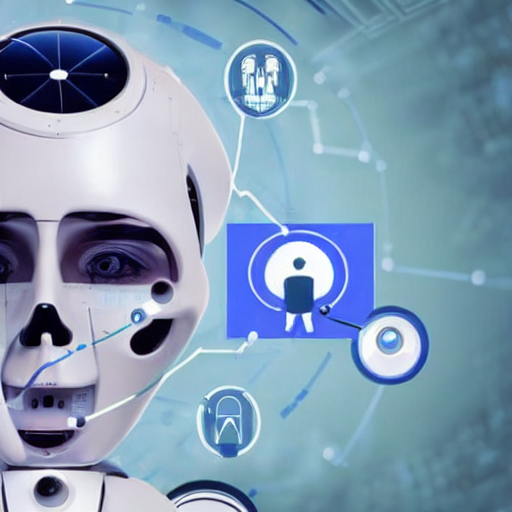

Audio saved as news_audio.mp3


Video saved as news_video.mp4


In [6]:
# 1. Generate 100-200 word news summary using GPT-2
from transformers import pipeline

topic = "AI in healthcare"
generator = pipeline("text-generation", model="gpt2")

prompt = f"Write a short 150 word news summary about: {topic}"
result = generator(prompt, max_length=180)[0]['generated_text']

print("---- NEWS SUMMARY ----")
print(result)

# 2. Generate a realistic news image using Stable Diffusion
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

image_prompt = f"A photorealistic news photo about {topic}"
image = pipe(image_prompt, guidance_scale=7.5).images[0]
image.save("news_image.png")

print("Image saved as news_image.png")
display(image)

# 3. Convert summary to speech using gTTS
from gtts import gTTS

tts = gTTS(result, lang="en")
tts.save("news_audio.mp3")

print("Audio saved as news_audio.mp3")
from IPython.display import Audio
display(Audio("news_audio.mp3"))

# 4. Create a short 5-second video from the generated image
import imageio
import numpy as np
from PIL import Image

img = Image.open("news_image.png").resize((720, 480))
frame = np.array(img)

# 8 FPS × 5 seconds = 40 frames
frames = [frame for i in range(40)]

imageio.mimsave("news_video.mp4", frames, fps=8)

print("Video saved as news_video.mp4")
from IPython.display import Video
display(Video("news_video.mp4", embed=True, width=560))

In [ ]:
#Scenario 2: “Cultural Story Revival Project”
Scenario:
You are working on a heritage preservation project that uses AI to retell
traditional folk tales.
Your system should:
 Accept a title or theme (e.g., “Panchatantra wisdom”)
 Generate a story in that style
 Create matching artwork and narration
 Produce a short video that can be shared online
Question:
How would you fine-tune the story generation and image prompts to reflect
specific cultural contexts or story styles?
How could multilingual text-to-speech improve accessibility?

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=380) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


---- FOLK TALE ----
Write a 300 word folk tale titled 'The Clever Rabbit' with a moral at the end. I don't think any of us will ever be able to tell this story and it's really amazing how much it touched people's lives.

In The Clever Rabbit, the story of a young boy who is the only child of a housekeeper who was murdered and left to grow up in the woods. He learns to be a good boy and, along with his wife and their three children, his mother, and his father, are the only ones who can save him.

It is set in the year 1841, when the great British philosopher Sir Henry Le Guin writes that, "There is in the world a world which has been made in the image of God, and where all things that are not of man are now made, but which are of God, and which are not of man are not in God."

"We must be a great nation, and we must be a great nation, and we must be a great nation, not only because it is a great nation, but because it is a great nation."

It is a story told by a man who lives in his mid

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Artwork saved as folk_art.png


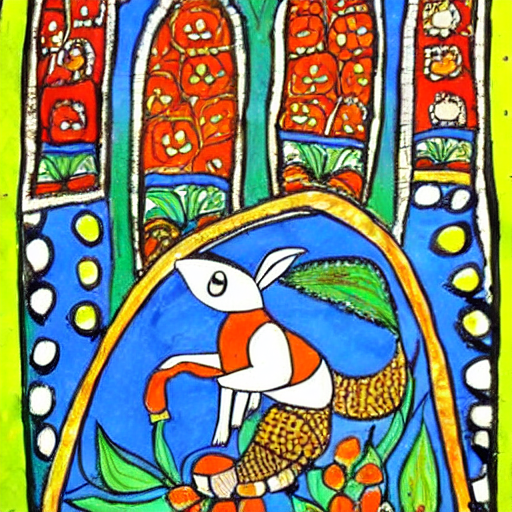

Audio saved as folk_audio.mp3


Video saved as folk_video.mp4


In [7]:
# 1. Generate 250-350 word cultural folk story
from transformers import pipeline

title = "The Clever Rabbit"
prompt = f"Write a 300 word folk tale titled '{title}' with a moral at the end."

generator = pipeline("text-generation", model="gpt2")
story = generator(prompt, max_length=380)[0]['generated_text']

print("---- FOLK TALE ----")
print(story)

# 2. Generate cultural artwork
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

art_prompt = f"Madhubani style painting about the folk tale '{title}'"
image = pipe(art_prompt, guidance_scale=7.5).images[0]
image.save("folk_art.png")

print("Artwork saved as folk_art.png")
display(image)

# 3. Convert the story to narration (TTS)
from gtts import gTTS

tts = gTTS(story, lang="en")
tts.save("folk_audio.mp3")

print("Audio saved as folk_audio.mp3")
from IPython.display import Audio
display(Audio("folk_audio.mp3"))

# 4. Create a short 5-second video from the artwork
import imageio
import numpy as np
from PIL import Image

img = Image.open("folk_art.png").resize((720, 480))
frame = np.array(img)

frames = [frame for i in range(40)]   # 5 seconds at 8 FPS
imageio.mimsave("folk_video.mp4", frames, fps=8)

print("Video saved as folk_video.mp4")
from IPython.display import Video
display(Video("folk_video.mp4", embed=True, width=560))